In [1]:
from training_defs import load_spectral_data, get_dataloaders
from model import MLP
import torch, torch.nn as nn, torch.optim as optim
import matplotlib.pyplot as plt

X, y = load_spectral_data()
train_loader, val_loader = get_dataloaders(X, y)

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP(in_dim=X.shape[1], h_dim=128, out_dim=3).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

n_epochs = 50
train_losses, val_losses = [], []

In [3]:
for epoch in range(1, n_epochs+1):
    # train
    model.train()
    tot_train = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        optimizer.step()
        tot_train += loss.item() * xb.size(0)
    train_losses.append(tot_train / len(train_loader.dataset))

    # validate
    model.eval()
    tot_val = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            tot_val += criterion(model(xb), yb).item() * xb.size(0)
    val_losses.append(tot_val / len(val_loader.dataset))

    print(f"Epoch {epoch:02d}  Train MSE: {train_losses[-1]:.4f}  Val MSE: {val_losses[-1]:.4f}")

Epoch 01  Train MSE: 0.0900  Val MSE: 0.0534
Epoch 02  Train MSE: 0.0567  Val MSE: 0.0470
Epoch 03  Train MSE: 0.0507  Val MSE: 0.0404
Epoch 04  Train MSE: 0.0470  Val MSE: 0.0380
Epoch 05  Train MSE: 0.0414  Val MSE: 0.0332
Epoch 06  Train MSE: 0.0358  Val MSE: 0.0346
Epoch 07  Train MSE: 0.0327  Val MSE: 0.0433
Epoch 08  Train MSE: 0.0309  Val MSE: 0.0261
Epoch 09  Train MSE: 0.0265  Val MSE: 0.0307
Epoch 10  Train MSE: 0.0261  Val MSE: 0.0414
Epoch 11  Train MSE: 0.0309  Val MSE: 0.0308
Epoch 12  Train MSE: 0.0253  Val MSE: 0.0206
Epoch 13  Train MSE: 0.0197  Val MSE: 0.0201
Epoch 14  Train MSE: 0.0185  Val MSE: 0.0185
Epoch 15  Train MSE: 0.0194  Val MSE: 0.0214
Epoch 16  Train MSE: 0.0167  Val MSE: 0.0167
Epoch 17  Train MSE: 0.0168  Val MSE: 0.0267
Epoch 18  Train MSE: 0.0173  Val MSE: 0.0160
Epoch 19  Train MSE: 0.0212  Val MSE: 0.0209
Epoch 20  Train MSE: 0.0200  Val MSE: 0.0153
Epoch 21  Train MSE: 0.0146  Val MSE: 0.0145
Epoch 22  Train MSE: 0.0141  Val MSE: 0.0151
Epoch 23  

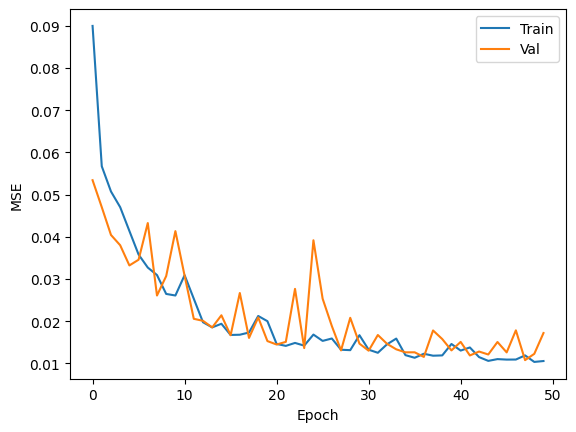

In [4]:
plt.plot(train_losses, label='Train')
plt.plot(val_losses,   label='Val')
plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.legend(); plt.show()

torch.save(model.state_dict(), 'spectra_mlp.pth')

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, root_mean_squared_error

model.eval()

all_preds, all_targets = [], []
with torch.no_grad():
    for xb, yb in val_loader:
        xb, yb = xb.to(device), yb.to(device)
        preds = model(xb)
        all_preds.append(preds.cpu().numpy())
        all_targets.append(yb.cpu().numpy())

all_preds = np.vstack(all_preds)
all_targets = np.vstack(all_targets)

r2 = r2_score(all_targets, all_preds, multioutput='uniform_average')
rmse = root_mean_squared_error(all_targets, all_preds)

print(f"Validation R²:  {r2:.4f}")
print(f"Validation RMSE: {rmse:.4f}")

Validation R²:  0.8040
Validation RMSE: 0.1296
